# EDA 

In [19]:
# Importing libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [20]:
df = pd.read_csv('data/ev_sales_data.csv')

## Checking Data Quality

In [21]:
# View first 5 rows
df.head()

# Basic info: columns, types, nulls
df.info()

# Summary stats for numeric columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        214 non-null    int64  
 1   Brand         214 non-null    object 
 2   Year          214 non-null    int64  
 3   Engine Size   214 non-null    float64
 4   Fuel Type     214 non-null    object 
 5   Transmission  214 non-null    object 
 6   Mileage       214 non-null    int64  
 7   Condition     214 non-null    object 
 8   Price         214 non-null    float64
 9   Model         214 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 16.8+ KB


,Car ID,Year,Engine Size,Mileage,Price
count,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1206.546729,2011.584112,3.581776,142095.102804,51354.987710
std,690.684464,6.878553,1.367151,86622.552298,26107.839132
min,2.000000,2000.000000,1.000000,15.000000,5011.270000
25%,673.250000,2005.000000,2.500000,64220.750000,28580.895000
50%,1252.500000,2012.000000,3.700000,148119.500000,53172.070000
75%,1794.750000,2017.750000,4.600000,206059.750000,70894.670000
max,2488.000000,2023.000000,6.000000,299334.000000,99968.620000


In [25]:
# Observing DataFrame 
df.head()


,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
1,7,Audi,2020,4.0,Electric,Automatic,135486,Used,63498.75,Q5
2,12,Ford,2017,5.7,Electric,Automatic,169737,Used,28074.19,Mustang
3,16,Ford,2010,3.9,Electric,Automatic,240904,Used,21796.16,Mustang
4,22,Mercedes,2022,2.3,Electric,Manual,12150,Used,61393.26,E-Class


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        214 non-null    int64  
 1   Brand         214 non-null    object 
 2   Year          214 non-null    int64  
 3   Engine Size   214 non-null    float64
 4   Fuel Type     214 non-null    object 
 5   Transmission  214 non-null    object 
 6   Mileage       214 non-null    int64  
 7   Condition     214 non-null    object 
 8   Price         214 non-null    float64
 9   Model         214 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 16.8+ KB


In [27]:
df.describe()

,Car ID,Year,Engine Size,Mileage,Price
count,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1206.546729,2011.584112,3.581776,142095.102804,51354.987710
std,690.684464,6.878553,1.367151,86622.552298,26107.839132
min,2.000000,2000.000000,1.000000,15.000000,5011.270000
25%,673.250000,2005.000000,2.500000,64220.750000,28580.895000
50%,1252.500000,2012.000000,3.700000,148119.500000,53172.070000
75%,1794.750000,2017.750000,4.600000,206059.750000,70894.670000
max,2488.000000,2023.000000,6.000000,299334.000000,99968.620000


# Exploring the Data 

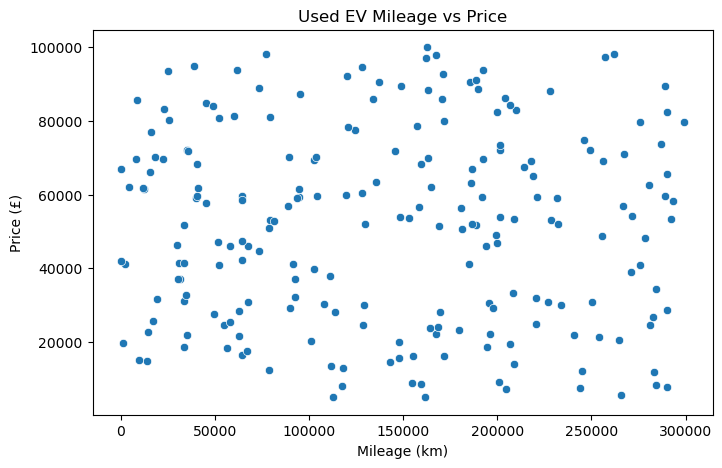

In [37]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Mileage', y='Price', data=df)
plt.title('Used EV Mileage vs Price')
plt.xlabel('Mileage (km)')
plt.ylabel('Price (£)')
plt.show()


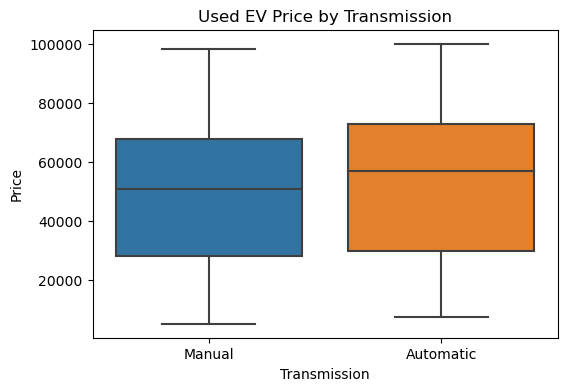

In [40]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Transmission', y='Price', data=df)
plt.title('Used EV Price by Transmission')
plt.show()


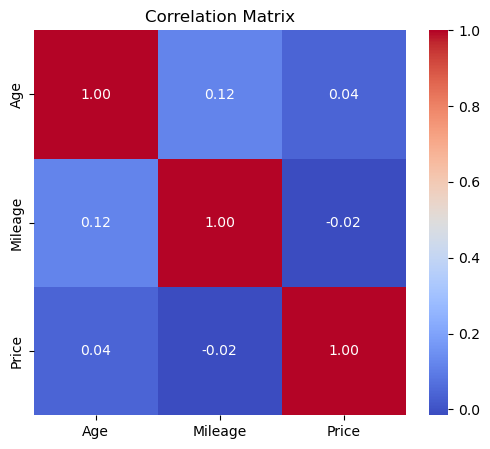

In [41]:
numeric_cols = ['Age', 'Mileage', 'Price']
corr = df[numeric_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


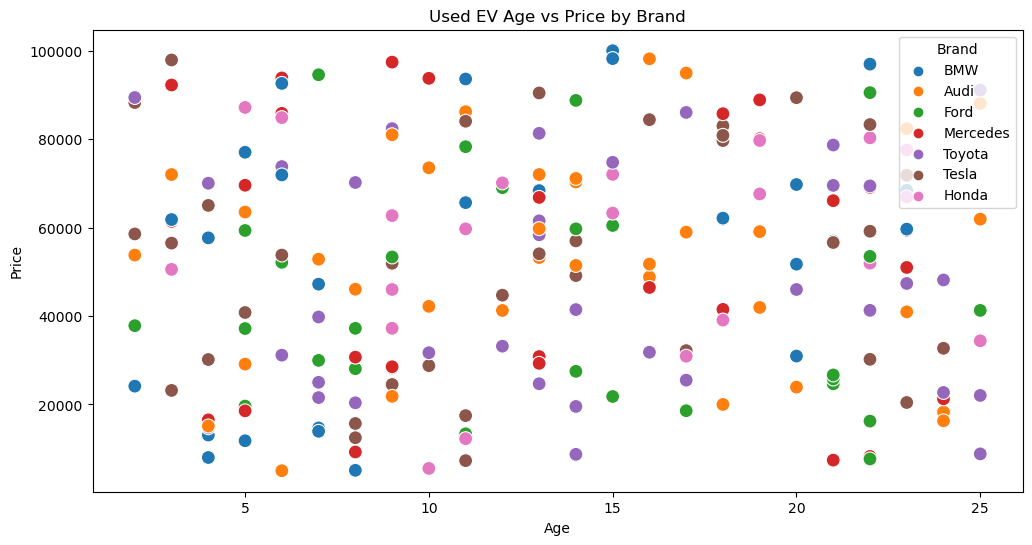

In [42]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age', y='Price', hue='Brand', data=df, s=100)
plt.title('Used EV Age vs Price by Brand')
plt.show()


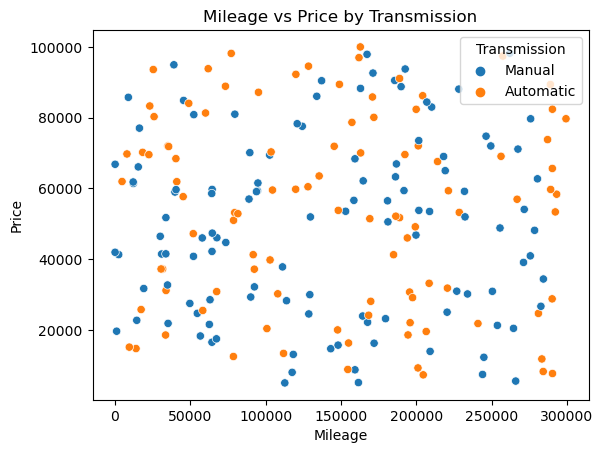

In [43]:
sns.scatterplot(x='Mileage', y='Price', hue='Transmission', data=df)
plt.title('Mileage vs Price by Transmission')
plt.show()


# Brand Level Analysis 

In [44]:
# Average price by brand
brand_summary = df.groupby('Brand')['Price'].agg(['mean', 'median', 'count', 'min', 'max']).sort_values('mean', ascending=False)
print(brand_summary)


                  mean     median  count      min       max
Brand                                                      
Honda     56166.876667  62695.840     21  5535.30  87147.83
BMW       53891.946129  59521.860     31  5107.22  99968.62
Mercedes  53458.727692  56180.045     26  7407.08  97394.95
Audi      53316.278611  53172.070     36  5011.27  98137.19
Tesla     52503.034865  54054.800     37  7292.61  97878.43
Toyota    47643.674722  43713.745     36  8716.86  91057.57
Ford      43433.892593  37203.390     27  7669.66  94530.77


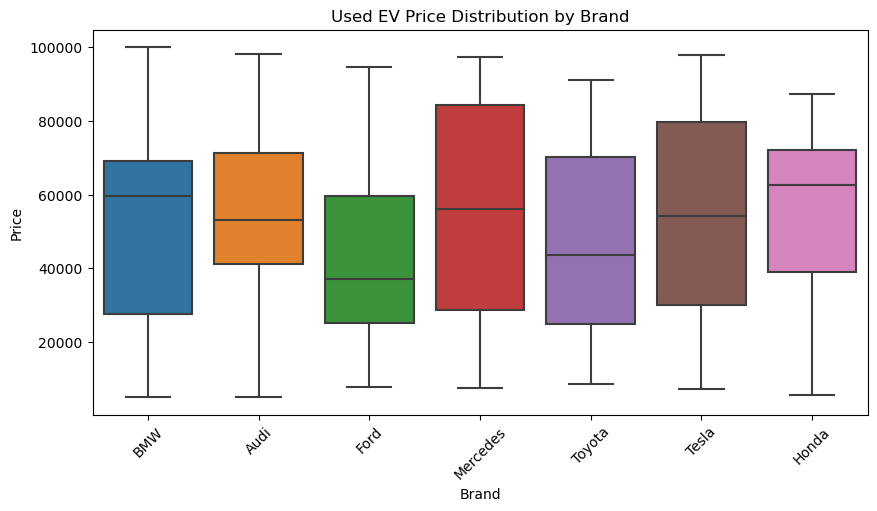

In [45]:
# Boxplot per brand
plt.figure(figsize=(10,5))
sns.boxplot(x='Brand', y='Price', data=df)
plt.title('Used EV Price Distribution by Brand')
plt.xticks(rotation=45)
plt.show()


In [47]:
df["Brand"].unique()

array(['BMW', 'Audi', 'Ford', 'Mercedes', 'Toyota', 'Tesla', 'Honda'],
      dtype=object)

In [48]:
# Define premium brands
premium_brands = ['Tesla', 'BMW', 'Audi', 'Mercedes']

# Create Brand_Tier column
df['Brand_Tier'] = df['Brand'].apply(lambda x: 'Premium' if x in premium_brands else 'Standard')

# Quick check
df[['Brand', 'Brand_Tier']].drop_duplicates()


,Brand,Brand_Tier
0,BMW,Premium
1,Audi,Premium
2,Ford,Standard
4,Mercedes,Premium
5,Toyota,Standard
14,Tesla,Premium
16,Honda,Standard


# Feature Engineering

In [49]:
current_year = 2025

# Age
df['Age'] = current_year - df['Year']

# Age bands
df['Age_Band'] = pd.cut(df['Age'], bins=[0,2,4,10], labels=['0-2','3-4','5+'])

# Mileage per year (proxy for usage intensity)
df['Mileage_per_Year'] = df['Mileage'] / df['Age'].replace(0,1)

# Mileage bands
df['Mileage_Band'] = pd.cut(df['Mileage'], bins=[0,15000,30000,50000,100000], labels=['Very Low','Low','Medium','High'])


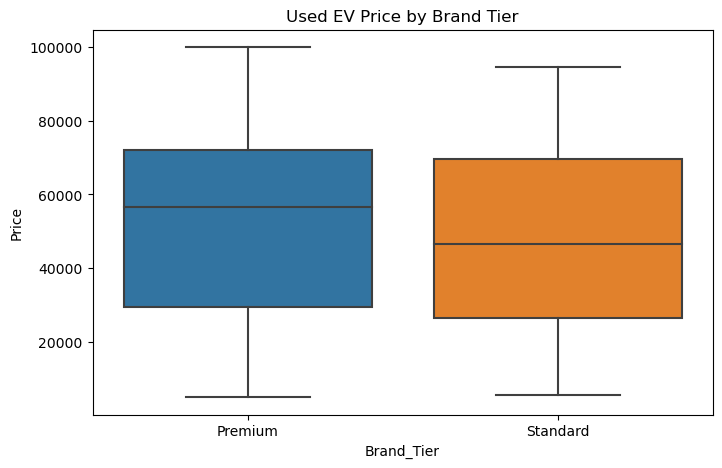

In [50]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Brand_Tier', y='Price', data=df)
plt.title('Used EV Price by Brand Tier')
plt.show()


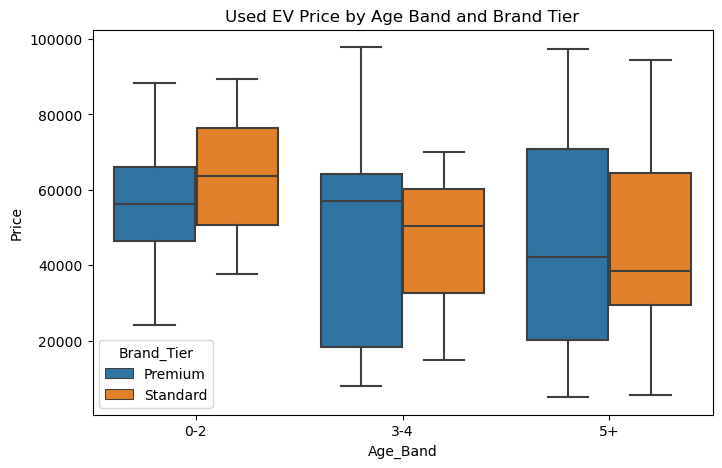

In [51]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Age_Band', y='Price', hue='Brand_Tier', data=df)
plt.title('Used EV Price by Age Band and Brand Tier')
plt.show()


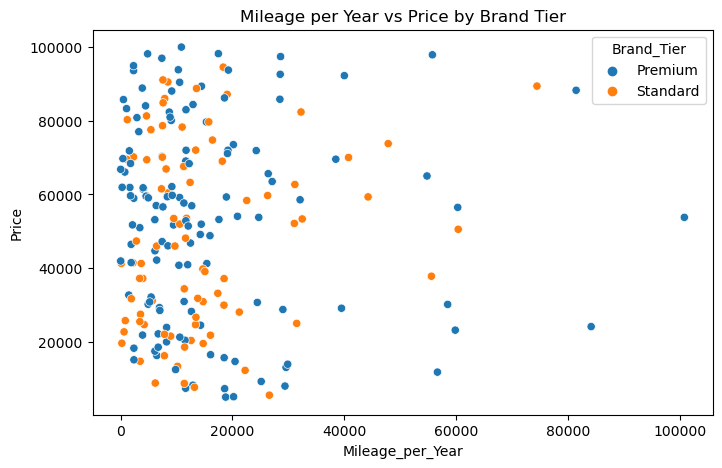

In [52]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Mileage_per_Year', y='Price', hue='Brand_Tier', data=df)
plt.title('Mileage per Year vs Price by Brand Tier')
plt.show()


In [54]:
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model,Age,Brand_Tier,Age_Band,Mileage_per_Year,Mileage_Band
0,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series,7,Premium,5+,20455.714286,NaN
1,7,Audi,2020,4.0,Electric,Automatic,135486,Used,63498.75,Q5,5,Premium,5+,27097.200000,NaN
2,12,Ford,2017,5.7,Electric,Automatic,169737,Used,28074.19,Mustang,8,Standard,5+,21217.125000,NaN
3,16,Ford,2010,3.9,Electric,Automatic,240904,Used,21796.16,Mustang,15,Standard,NaN,16060.266667,NaN
4,22,Mercedes,2022,2.3,Electric,Manual,12150,Used,61393.26,E-Class,3,Premium,3-4,4050.000000,Very Low
